<a href="https://colab.research.google.com/github/harrisb002/CircuitTester/blob/main/Quiz_4_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Used to display photos
from IPython import display

# Problem 1
> Design a divide and conquer algorithm NumOnes to solve the following problem:
- Given two integers L and R, MaxOnes returns the total number of 1's in the binary representation of all the integers from L to R (both included).
 - For example, if L = 7 and R = 10, the answer is 3 + 1 + 2 + 2 = 8.

Here the divide and conquer works by reducing the problem size in half and makes only one recursive call on the reduced instance (like Quick-select.) Obtain an estimate of the time complexity if L and R are n-bit integers.

NOTES:
- For Counting the ones
 - Init count = 0.
 - Loop while num >= 1.
 - Inside the loop, use the mod to check for odd number, if so inc by 1
 - Divide num by 2 and repeat
 - Finanly just return the count.

- For Recursion use a Binary search like algo (div & conq)
 - If Left > Right, return 0.
 - If Left == Right, return the number of 1's in the binary representation of Left.
 - Let M be the middle int between Left and Right. Choose Mid as the floor value of (Left+Right)/2 to ensure its an int. (Just like binay search)
 - Compute the number of 1's for the range[Left, Mid] & [Mid+1, Right] and sum them.
 - Return the sum.

In [4]:
def countOnes(num):
    count = 0
    while num >= 1:
        count += num % 2
        num //= 2
    return count

def NumOnes(Left, Right):
    if Left > Right:
        return 0
    if Left == Right:
        return countOnes(Left)
    Mid = (Left + Right) // 2
    return NumOnes(Left, Mid) + NumOnes(Mid + 1, Right)

In [5]:
print(NumOnes(9,12))

9


**Complexity Analysis:**
- countOnes Function:
 - The countOnes function counts the number of ones in the binary representation of a single integer num.
 - It uses a loop runs as long as num >= 1 and in each iteration it performs two operations: % 2 and // 2.
 - The number of iterations is == the number of bits in the binary representation of the input number.
 - Therefore, the time complexity of the **countOnes function is O(log N)**, where N is the value of the input number num.

- NumOnes function splits the range [Left, Right] into two equal subranges, [Left, Mid] and [Mid + 1, Right].
 - The function makes two rec. calls on these subranges and then sums the results.
 - The **number of recursive calls is** == to the depth of the recursion tree  which is **O(log N)** where N is the size of the input range (Right - Left + 1).
 - In each rec. call it also call the countOnes function which takes O(log N) time.

**SOLUTION:**
Therefore the overall time complexity is: O(log N) * O(log N) = O((log N)^2).


# Problem 2
> Show all the steps involved in obtaining the convolution of  x = ⟨1,1,1,0⟩ and y = ⟨1,1,0,0⟩.

- First obtain the Fourier transforms of x and y, compute the component-wise product of these vectors, and obtain the inverse Fourier transform.

- **Steps for FT:**
1.   Create polynomial using the expression
2.   Evaluate at each point (1, i, -1, -i)
3.   Results are the FT

- **For IFFT:**
1.   Take dot product of both FT vectors
2.   IFT(v)=1/4<a,d,c,b>. (n=length of vector)



- **x = ⟨1,1,1,0⟩** **=> Polynomial Rep: 1 + x + x^2**
1. Evaluate at 1:  1 + 1 + 1 = 3    
2. Evaluate at i:  1 + i + (-1) = i
3. Evaluate at -1: 1 + (-1) + 1 = - 1
4. Evaluate at -i: 1 + (-i) + 1 = 2 - i

**Result of FT(x) = ⟨ 3, i, -1, 2 - i ⟩**

- **y = ⟨1,1,0,0⟩** **=> Polynomial Rep: 1 + x**
1. Evaluate at 1:  1 + 1 = 2     
2. Evaluate at i:  1 + i
3. Evaluate at -1: 1 + (-1) = 0
4. Evaluate at -i: 1 - i

**Result of FT(y) = ⟨ 2, 1 + i, 0, 1 - i ⟩**

Using the Results above, find the IFFT

1.   Dot product of FT(x) · FT(y)
- ⟨ 3, i, -1, 2 - i ⟩ · ⟨ 2, 1 + i, 0, 1 - i ⟩ = ⟨ 6, 1 - i, 0, 3 - 3i ⟩

2. Now Multiply by 1/n
- 1/4 ⟨ 6, 1 - i, 0, 3 - 3i ⟩ = ⟨ 6/4, 1/4 - i/4, 0, 3/4 - 3i/4 ⟩

**SOLUTION:**
Results in an IFFT = ⟨ 6/4, (1-i)/4, 0, 3/4 - 3i/4 ⟩



# Problem 3
> Exhibit the breadth-first spanning tree in the graph shown below if the search starts in vertex 2. Also show DIST, PARENT arrays when the algorithm terminates.

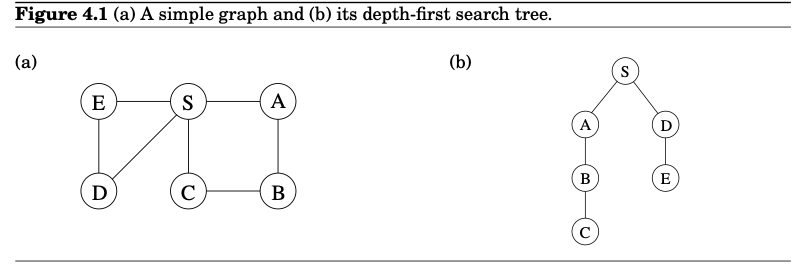

In [6]:
display.Image("/content/BFS_Example.png")

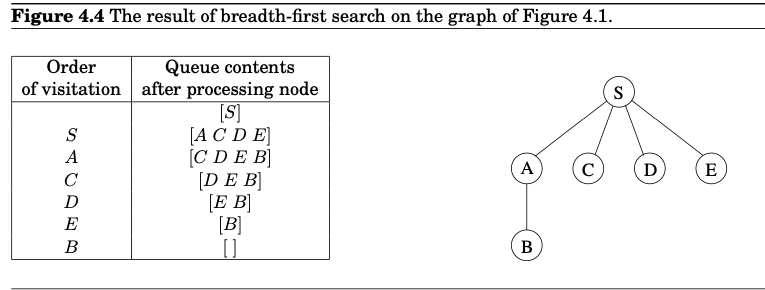

In [7]:
display.Image("/content/BFS_Example2.png")

**Notes from the Book:**

- Breadth-first search makes sure to visit vertices in increasing order of their distance from the starting point 's'.
- BFS lifts the 's' partitions of the graph into layers:
 - 's' itself
 - The nodes at distance 1 from it
 - The nodes at distance 2 from it and so on.
- Compute distances from 's' to the other vertices layer by layer.
- Pick out the nodes at distance 0, 1, 2, . . . , d,
- The ones at d + 1 are easily determined:
 - They are precisely the as-yet-unseen nodes that are adjacent to the layer at distance d.
- This suggests an iterative algorithm in which two layers are active at any given time:
 - Some layer d, which has been fully identified, and d + 1, which is being discovered by scanning the neighbors of layer d.

- BFT does exactly what is described above. In synopsis:
 - Start with queue 'Q' consisting of only of 's'.
 - For each subsequent distance d = 1, 2, 3, . . ., there is a point in time at which Q contains all the nodes at distance d and nothing else.
 - As these nodes are processed (ejected off the front of the queue), their as-yet-unseen neighbors are injected into the end of the queue.

**Possible Answers:**
- Going to office hours for clarifacation

      2
   / / \ \
  1 3   4 5


       2
     /   \
    1     3
    |     |
    5     4


# Problem 4
> Describe a divide and conquer algorithm that takes as input the image on the left-side and outputs the image on the right side.

- You can assume functions for copying one block of image I (input) to a specified region of O (output) array etc.

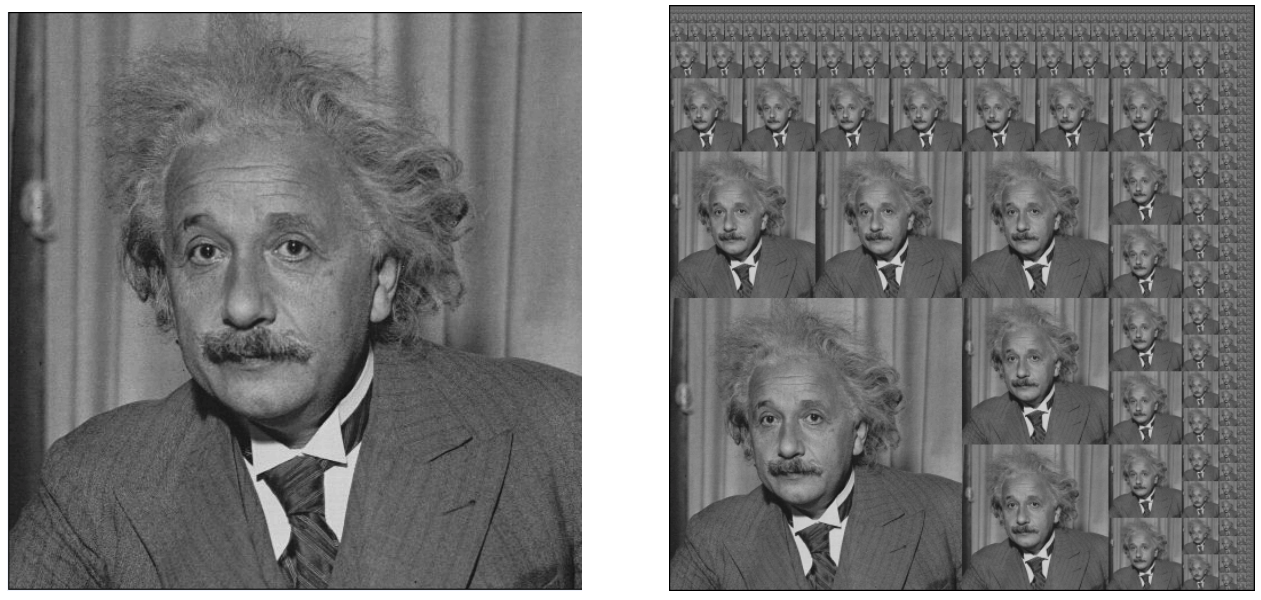

In [8]:
display.Image("/content/Einstein.png")

**SOLUTION:**
None Im sure about...

1.   Fibonacci Sequence?
2.   Use recursion for x-y axis seprately and merge them together

